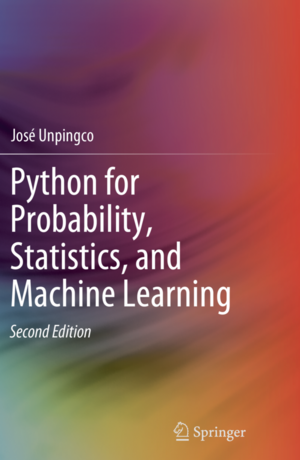

In [1]:
from IPython.display import Image
Image('../../Python_probability_statistics_machine_learning_2E.png',width=200)

The Bernoulli distribution we studied earlier answers the question of which of
two outcomes ($Y \in \lbrace 0,1 \rbrace$) would be selected with probability, $p$.

$$
\mathbb{P}(Y) = p^Y (1-p)^{ 1-Y }
$$

 We also know how to solve the corresponding likelihood function for
the maximum likelihood estimate of $p$ given observations of the output,
$\lbrace Y_i \rbrace_{i=1}^n$. However, now we want to include other factors in
our estimate of $p$. For example, suppose we observe not just the outcomes, but
a corresponding continuous variable, $x$. That is, the observed data is now
$\lbrace (x_i,Y_i) \rbrace_{i=1}^n$  How can we incorporate $x$ into our
estimation of $p$?

The most straightforward idea is to model $p= a x + b$ where $a,b$ are
parameters of a fitted line. However, because $p$ is a probability with value
bounded between zero and one, we need to wrap this estimate in another function
that can map the entire real line into the $[0,1]$ interval. The logistic
(a.k.a. sigmoid) function has this property,

$$
\theta(s) = \frac{e^s}{1+e^s}
$$

 Thus, the new parameterized estimate for $p$ is the following,

<!-- Equation labels as ordinary links -->
<div id="eq:prob"></div>

$$
\begin{equation}
\hat{p} = \theta(a x+b)= \frac{e^{a x + b}}{1+e^{a x + b}} 
\label{eq:prob} \tag{1}
\end{equation}
$$

 The *logit* function is defined as the following,

$$
\texttt{logit}(t)= \log \frac{t}{1-t}
$$

 It has the important property of extracting the regression components 
from the probability estimator,

$$
\texttt{logit}(p) = b + a x
$$

 More continuous variables can be accommodated easily as

$$
\texttt{logit}(p) = b + \sum_k a_k x_k
$$

 This can be further extended beyond the binary case to multiple
target labels. The maximum likelihood estimate of this uses
numerical optimization methods that are implemented in Scikit-learn.

Let's construct some data to see how this works. In the following, we assign
class labels to a set of randomly scattered points in the two-dimensional
plane,

In [2]:
%matplotlib inline

import numpy as np
from matplotlib.pylab import subplots
v = 0.9
@np.vectorize
def gen_y(x):
    if x<5: return np.random.choice([0,1],p=[v,1-v]) 
    else:   return np.random.choice([0,1],p=[1-v,v])

xi = np.sort(np.random.rand(500)*10)
yi = gen_y(xi)

**Programming Tip.**

The `np.vectorize` decorator used in the code above makes it easy to avoid
looping in code that uses Numpy arrays by embedding the looping semantics
inside of the so-decorated function. Note, however, that this does not
necessarily accelerate the wrapped function. It's mainly for convenience.



[Figure](#fig:logreg_001) shows a scatter plot of the data we constructed in
the above code, $\lbrace (x_i,Y_i) \rbrace$. As constructed, it is more
likely that large values of $x$ correspond to $Y=1$. On the other hand, values
of $x \in [4,6]$ of either category are heavily overlapped. This means that $x$
is not a particularly strong indicator of $Y$ in this region.  [Figure](#fig:logreg_002) shows the fitted logistic regression curve against the same
data. The points along the curve are the probabilities that each point lies in
either of the two categories. For large values of $x$ the curve is near one,
meaning that the probability that the associated $Y$ value is equal to one. On
the other extreme, small values of $x$ mean that this probability is close to
zero.  Because there are only two possible categories, this means that the
probability of $Y=0$ is thereby higher. The region in the middle corresponding
to the middle probabilities reflect the ambiguity between the two catagories
because of the overlap in the data for this region. Thus, logistic regression
cannot make a strong case for one category here.
The following code fits the logistic regression model,

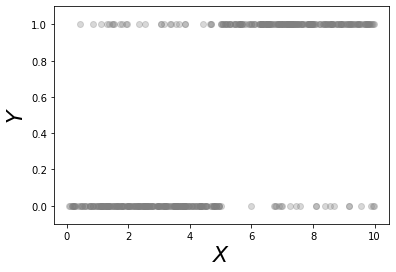

In [3]:
fig,ax=subplots()
_=ax.plot(xi,yi,'o',color='gray',alpha=.3)
_=ax.axis(ymax=1.1,ymin=-0.1)
_=ax.set_xlabel(r'$X$',fontsize=22)
_=ax.set_ylabel(r'$Y$',fontsize=22)
fig.savefig('fig-machine_learning/logreg_001.png')

In [4]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(np.c_[xi],yi)

/home/unpingco/.conda/envs/pypsml2E/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

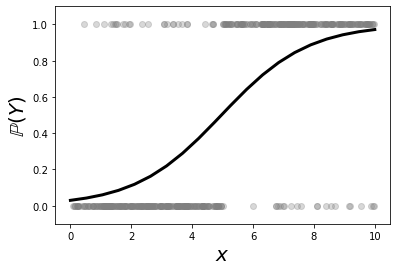

In [5]:
fig,ax=subplots()
xii=np.linspace(0,10,20)
_=ax.plot(xii,lr.predict_proba(np.c_[xii])[:,1],'k-',lw=3)
_=ax.plot(xi,yi,'o',color='gray',alpha=.3)
_=ax.axis(ymax=1.1,ymin=-0.1)
_=ax.set_xlabel(r'$x$',fontsize=20)
_=ax.set_ylabel(r'$\mathbb{P}(Y)$',fontsize=20)
fig.savefig('fig-machine_learning/logreg_002.png')

<!-- dom:FIGURE: [fig-machine_learning/logreg_001.png, width=500 frac=0.75]  This scatterplot shows the binary $Y$ variables and the corresponding $x$ data for each category. <div id="fig:logreg_001"></div> -->
<!-- begin figure -->
<div id="fig:logreg_001"></div>

<p>This scatterplot shows the binary $Y$ variables and the corresponding $x$ data for each category.</p>
<img src="fig-machine_learning/logreg_001.png" width=500>

<!-- end figure -->


<!-- dom:FIGURE: [fig-machine_learning/logreg_002.png, width=500 frac=0.75]  This shows the fitted logistic regression on the data shown in [Figure](#fig:logreg_001). The points along the curve are the probabilities that each point lies in either of the two categories.  <div id="fig:logreg_002"></div> -->
<!-- begin figure -->
<div id="fig:logreg_002"></div>

<p>This shows the fitted logistic regression on the data shown in [Figure](#fig:logreg_001). The points along the curve are the probabilities that each point lies in either of the two categories.</p>
<img src="fig-machine_learning/logreg_002.png" width=500>

<!-- end figure -->


For a deeper understanding of logistic regression, we need to alter our
notation slightly and once again use our projection methods. More generally we
can rewrite Equation ([1](#eq:prob)) as the following,

<!-- Equation labels as ordinary links -->
<div id="eq:probbeta"></div>

$$
\begin{equation}
p(\mathbf{x}) = \frac{1}{1+\exp(-\boldsymbol{\beta}^T \mathbf{x})}
\label{eq:probbeta} \tag{2}
\end{equation}
$$

 where $\boldsymbol{\beta}, \mathbf{x}\in \mathbb{R}^n$.  From our
prior work on projection we know that the signed perpendicular distance between
$\mathbf{x}$ and the linear boundary described by $\boldsymbol{\beta}$ is
$\boldsymbol{\beta}^T \mathbf{x}/\Vert\boldsymbol{\beta}\Vert$.  This means
that the probability that is assigned to any point in $\mathbb{R}^n$ is a
function of how close that point is to the linear boundary described by the
following equation,

$$
\boldsymbol{\beta}^T \mathbf{x} = 0
$$

 But there is something subtle hiding here. Note that 
for any $\alpha\in\mathbb{R}$,

$$
\alpha\boldsymbol{\beta}^T \mathbf{x} = 0
$$

 describes the *same* hyperplane. This means that we can multiply
$\boldsymbol{\beta}$ by an arbitrary scalar and still get the same geometry.
However, because of $\exp(-\alpha\boldsymbol{\beta}^T \mathbf{x})$ in Equation
([2](#eq:probbeta)), this scaling determines the intensity of the probability
attributed to $\mathbf{x}$. This is illustrated in [Figure](#fig:logreg_003).
The panel on the left shows two categories (squares/circles) split by the
dotted line that is determined by $\boldsymbol{\beta}^T\mathbf{x}=0$. The
background colors show the probabilities assigned to points in the plane.  The
right panel shows that by scaling with $\alpha$, we can increase the
probabilities of class membership for the given points, given the exact same
geometry. The points near the boundary have lower probabilities because they
could easily be on the opposite side.  However, by scaling by $\alpha$, we can
raise those probabilities to any desired level at the cost of driving the
points further from the boundary closer to one. Why is this a problem? By
driving the probabilities arbitrarily using $\alpha$, we can overemphasize the
training set at the cost of out-of-sample data. That is, we may wind up
insisting on emphatic class membership of yet unseen points that are close to
the boundary that otherwise would have more equivocal probabilities (say, near
$1/2$).  Once again, this is another manifestation of bias/variance trade-off.

<!-- dom:FIGURE: [fig-machine_learning/logreg_003.png, width=500 frac=1.25] Scaling can arbitrarily increase the probabilities of points near the decision boundary.   <div id="fig:logreg_003"></div> -->
<!-- begin figure -->
<div id="fig:logreg_003"></div>

<p>Scaling can arbitrarily increase the probabilities of points near the decision boundary.</p>
<img src="fig-machine_learning/logreg_003.png" width=500>

<!-- end figure -->


Regularization is a method that controls this effect by penalizing the size of
$\beta$ as part of its solution. Algorithmically, logistic regression works by
iteratively solving a sequence of weighted least squares problems. Regression
adds a $\Vert\boldsymbol{\beta}\Vert/C$ term to the least squares error. To see
this in action, let's create some data from a logistic regression and see if we
can recover it using Scikit-learn. Let's start with a scatter of points in the
two-dimensional  plane,

In [6]:
x0,x1=np.random.rand(2,20)*6-3
X = np.c_[x0,x1,x1*0+1] # stack as columns

 Note that `X` has a third column of all ones. This is a
trick to allow the corresponding line to be offset from the origin
in the two-dimensional plane. Next, we create a linear boundary
and assign the class probabilities according to proximity to the
boundary.

In [7]:
beta = np.array([1,-1,1]) # last coordinate for affine offset
prd = X.dot(beta)
probs = 1/(1+np.exp(-prd/np.linalg.norm(beta)))
c = (prd>0) # boolean array class labels

  This establishes the training data.  The next block
creates the logistic regression object and fits the data.

In [8]:
lr = LogisticRegression()
_=lr.fit(X[:,:-1],c)

/home/unpingco/.conda/envs/pypsml2E/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 Note that we have to omit the third dimension because of
how Scikit-learn internally breaks down the components of the
boundary. The resulting code extracts the corresponding
$\boldsymbol{\beta}$ from the `LogisticRegression` object.

In [9]:
betah = np.r_[lr.coef_.flat,lr.intercept_]

**Programming Tip.**

The Numpy `np.r_`  object provides a quick way to stack Numpy
arrays horizontally instead of using `np.hstack`.



 The resulting boundary is shown in the left panel in [Figure](#fig:logreg_004). The crosses and triangles represent the two classes we
created above, along with the separating gray line.  The logistic regression
fit produces the dotted black line. The dark circle is the point that logistic
regression categorizes incorrectly. The regularization parameter is $C=1$ by
default. Next, we can change the strength of the regularization parameter as in
the following,

In [10]:
lr = LogisticRegression(C=1000)

 and the re-fit the data to produce the right panel in
[Figure](#fig:logreg_004). By increasing the regularization
parameter, we essentially nudged the fitting algorithm to
*believe* the data more than the general model. That is, by doing
this we accepted more variance in exchange for better bias.

<!-- dom:FIGURE: [fig-machine_learning/logreg_004.png, width=500 frac=1.25]  The left panel shows the resulting boundary (dashed line) with $C=1$ as the regularization parameter. The right panel is for $C=1000$. The gray line is the boundary used to assign the class membership for the synthetic data. The dark circle is the point that logistic regression categorizes incorrectly. <div id="fig:logreg_004"></div> -->
<!-- begin figure -->
<div id="fig:logreg_004"></div>

<p>The left panel shows the resulting boundary (dashed line) with $C=1$ as the regularization parameter. The right panel is for $C=1000$. The gray line is the boundary used to assign the class membership for the synthetic data. The dark circle is the point that logistic regression categorizes incorrectly.</p>
<img src="fig-machine_learning/logreg_004.png" width=500>

<!-- end figure -->



### Maximum Likelihood Estimation for Logistic Regression

Let us again consider the binary classification problem.  We define $y_k =
\mathbb{P}(C_1\vert \mathbf{x}_k)$, the conditional probability of the data as
a member of given class. Our construction of this problem provides

$$
y_k = \theta([\mathbf{w},w_0] \cdot [\mathbf{x}_k,1])
$$

 where $\theta$ is the logistic function.  Recall that there are only
two classes for this problem. The data set looks like the following,

$$
\lbrace(\mathbf{x}_0,r_0),\ldots,(\mathbf{x}_k,r_k),\ldots,(\mathbf{x}_{n-1},r_{n-1})\rbrace
$$

 where $r_k\in \lbrace 0,1 \rbrace$. For example, we could have the
following sequence of observed classes,

$$
\lbrace C_0,C_1,C_1,C_0,C_1 \rbrace
$$

 For this case the likelihood is then the following,

$$
\ell= \mathbb{P}(C_0\vert\mathbf{x}_0)\mathbb{P}(C_1\vert\mathbf{x}_1)\mathbb{P}(C_1\vert\mathbf{x}_1) \mathbb{P}(C_0\vert\mathbf{x}_0)\mathbb{P}(C_1\vert\mathbf{x}_1)
$$

 which we can rewrite as the following,

$$
\ell(\mathbf{w},w_0)= (1-y_0) y_1 y_2 (1-y_3) y_4
$$

 Recall that there are two mutually exhaustive classes. More
generally, this can be written as the following,

$$
\ell(\mathbf{w}\vert\mathcal{X})=\prod_k^n y_k^{r_k} (1-y_k)^{1-r_k}
$$

 Naturally, we want to compute the logarithm of this as the cross-entropy,

$$
E = -\sum_k r_k \log(y_k) + (1-r_k)\log(1-y_k)
$$

 and then minimize this to find $\mathbf{w}$ and $w_0$. This is
difficult to do with calculus because the derivatives have non-linear terms in
them that are hard to solve for. 

### Multi-Class Logistic Regression Using Softmax

The logistic regression problem provides a solution for the probability
between exactly two alternative classes. To extend to the multi-class
problem, we need the *softmax* function. Consider the likelihood 
ratio between the $i^{th}$ class and the reference class, $\mathcal{C}_k$,

$$
\log\frac{p(\mathbf{x}\vert \mathcal{C}_i)}{p(\mathbf{x}\vert\mathcal{C}_k)} = \mathbf{w}_i^T \mathbf{x}
$$

 Taking the exponential of this and normalizing across all
the classes gives the softmax function,

$$
y_i=p(\mathcal{C}_i \vert\mathbf{x})=\frac{\exp\left(\mathbf{w}_i^T\mathbf{x}\right)}{\sum_k \exp\left( \mathbf{w}_k^T \mathbf{x}\right)}
$$

 Note that $\sum_i y_i=1$. If the $\mathbf{w}_i^T \mathbf{x}$ term is
larger than the others, after the exponentiation and normalization, it
automatically suppresses the other $y_j \forall j \neq i$, which acts like the
maximum function, except this function is differentiable, hence *soft*, as in
*softmax*.  While that is all straightforward, the trick is deriving the
$\mathbf{w}_i$ vectors from the training data $\lbrace\mathbf{x}_i,y_i\rbrace$.

Once again, the launching point is the likelihood function. As with the
two-class logistic regression problem, we have the likelihood as the following,

$$
\ell = \prod_k \prod_i (y_i^k)^{r_i^k}
$$

 The log-likelihood of this is the same as the cross-entropy,

$$
E = - \sum_k \sum_i r_i^k \log y_i^k
$$

 This is the error function we want to minimize. The computation works
as before with logistic regression, except there are more derivatives to keep
track of in this case.

### Understanding Logistic Regression

To generalize this technique beyond logistic regression, we need to re-think
the problem more abstractly as the data set $\lbrace x_i, y_i \rbrace$.  We
have the $y_i \in \lbrace 0,1 \rbrace$ data modeled as Bernoulli random
variables. We also have the $x_i$ data associated with each $y_i$, but it is
not clear how to exploit this association.  What we would like is to construct
$\mathbb{E}(Y|X)$ which we already know (see [ch:prob](#ch:prob)) is the
best MSE estimator. For this problem, we have

$$
\mathbb{E}(Y|X) =\mathbb{P}(Y|X)
$$

 because only $Y=1$ is nonzero in the summation. Regardless, we 
don't have the conditional probabilities anyway. One way to look at 
logistic regression is as a way to build in the functional relationship 
between $y_i$ and $x_i$. The simplest thing we could do is 
approximate,

$$
\mathbb{E}(Y|X) \approx \beta_0 + \beta_1 x := \eta(x)
$$

 If this is the model, then the target would be the $y_i$ data. We can
force the output of this linear regression into the interval $[0,1]$ by composing 
it with a sigmoidal function,

$$
\theta(x) = \frac{1}{1+\exp(-x)}
$$

 Then we have a new function $\theta(\eta(x))$ to match against $y_i$ using

$$
J(\beta_0,\beta_1) = \sum_i (\theta(\eta(x_i))-y_i)^2
$$

 This is a nice setup for an optimization problem. We could certainly
solve this numerically using `scipy.optimize`. Unfortunately, this would take
us into the black box of the optimization algorithm where we would lose all of
our intuitions and experience with linear regression.  We can take the opposite
approach. Instead of trying to squash the output of the linear estimator into
the desired domain, we can map the $y_i$ data into the unbounded space of the
linear estimator. Thus, we define the inverse of the above $\theta$ function as
the *link* function.

$$
g(y) = \log \left( \frac{y}{1-y} \right)
$$

 This means that our approximation to the 
unknown conditional expectation is the following,

$$
g(\mathbb{E}(Y|X)) \approx \beta_0 + \beta_1 x := \eta(x)
$$

 We cannot apply this directly to the $y_i$, so we compute the Taylor
series expansion centered on $\mathbb{E}(Y|X)$, up to the linear term, to obtain the
following,

$$
\begin{align*}
g(Y) & \approx & g(\mathbb{E}(Y|X)) + (Y-\mathbb{E}(Y|X)) g'(\mathbb{E}(Y|X))  \\
     & \approx & \eta(x) + (Y-\theta(\eta(x))) g'(\theta(\eta(x))) := z
\end{align*}
$$

 Because we do not know the conditional expectation, we replaced these
terms with our earlier $\theta(\eta(x))$ function.  This new approximation
defines our transformed data that we will use to feed the linear model.  Note
that the $\beta$ parameters are embedded in this transformation.  The
$(Y-\theta(\eta(x)))$ term acts as the usual additive noise term. Also,

$$
g'(x) = \frac{1}{x(1-x)}
$$

 The following code applies this transformation to the `xi,yi` data

In [11]:
import numpy as np
v = 0.9
@np.vectorize
def gen_y(x):
    if x<5: return np.random.choice([0,1],p=[v,1-v]) 
    else:   return np.random.choice([0,1],p=[1-v,v])

xi = np.sort(np.random.rand(500)*10)
yi = gen_y(xi)

In [12]:
b0, b1 = -2,0.5
g = lambda x: np.log(x/(1-x))
theta = lambda x: 1/(1+np.exp(-x))
eta = lambda x: b0 + b1*x
theta_ = theta(eta(xi))
z=eta(xi)+(yi-theta_)/(theta_*(1-theta_))

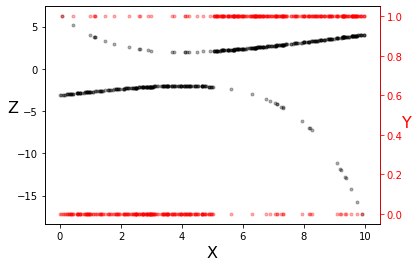

In [13]:
from matplotlib.pylab import subplots
fig,ax=subplots()
_=ax.plot(xi,z,'k.',alpha=.3)
_=ax2 = ax.twinx()
_=ax2.plot(xi,yi,'.r',alpha=.3)
_=ax2.set_ylabel('Y',fontsize=16,rotation=0,color='r')
_=ax2.spines['right'].set_color('red')
_=ax.set_xlabel('X',fontsize=16)
_=ax.set_ylabel('Z',fontsize=16,rotation=0)
_=ax2.tick_params(axis='y', colors='red')
fig.savefig('fig-machine_learning/glm_001.png')

<!-- dom:FIGURE: [fig-machine_learning/glm_001.png, width=500 frac=0.65] The transformation underlying logistic regression. <div id="fig:glm_001"></div> -->
<!-- begin figure -->
<div id="fig:glm_001"></div>

<p>The transformation underlying logistic regression.</p>
<img src="fig-machine_learning/glm_001.png" width=500>

<!-- end figure -->


Note the two vertical scales shown in [Figure](#fig:glm_001). The red scale on the
right is the $\lbrace 0,1 \rbrace$ domain of the $y_i$ data (red dots) and the
left scale is transformed $z_i$ data (black dots). Note that the transformed
data is more linear where the original data is less equivocal at the extremes.
Also, this transformation used a specific pair of  $\beta_i$ parameters. The
idea is to iterate over this transformation and derive new $\beta_i$
parameters.  With this approach,  we have

$$
\mathbb{V}(Z|X) = (g')^2 \mathbb{V}(Y|X)
$$

 Recall that, for this binary variable, we have

$$
\mathbb{P}(Y|X) = \theta(\eta(x)))
$$

 Thus,

$$
\mathbb{V}(Y|X) = \theta(\eta(x)) (1-\theta(\eta(x)))
$$

 from which we obtain

$$
\mathbb{V}(Z|X) = \left[ \theta(\eta(x))(1-\theta(\eta(x))) \right]^{-1}
$$

 The important fact here is the variance is a function of the $X$
(i.e., heteroskedastic). As we discussed with Gauss-Markov, the appropriate
linear regression is  weighted least-squares where the weights at each data
point are inversely proportional to the variance. This ensures that the
regression process accounts for this heteroskedasticity. Numpy has a weighted
least squares implemented in the `polyfit` function,

In [14]:
w=(theta_*(1-theta_))
p=np.polyfit(xi,z,1,w=np.sqrt(w))

 The output of this fit is shown in [Figure](#fig:glm_002), along
with the raw data and $\mathbb{V}(Z|X)$ for this particular fitted $\beta_i$.
Iterating a few more times refines the estimated line but it does not take many
such iterations to converge. As indicated by the variance line, the fitted line
favors the data at either extreme.

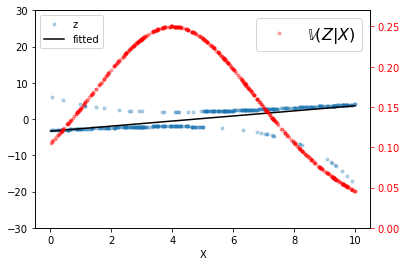

In [15]:
fig,ax=subplots()
ax2 = ax.twinx()
theta_ = theta(eta(xi))
_=ax.plot(xi,
        z,
        '.',alpha=.3,
        label='z'
       );
_=ax.axis(ymax=30,ymin=-30);
_=ax2.plot(xi,theta_*(1-theta_),'.r',alpha=.3,label='$\mathbb{V}(Z|X)$');
_=ax2.axis(ymax=0.27,ymin=0);
p=np.polyfit(xi,z,1,w=np.sqrt(w));
_=ax.plot(xi,np.polyval(p,xi),'k',label='fitted');
_=ax2.legend(fontsize=16);
_=ax.legend(loc=2);
_=ax.set_xlabel('X');
_=ax2.tick_params(axis='y', colors='red');
fig.savefig('fig-machine_learning/glm_002.png');

<!-- dom:FIGURE: [fig-machine_learning/glm_002.png, width=500 frac=0.65] The output of the weighted least squares fit is shown, along with the raw data and $\mathbb{V}(Z|X)$.  <div id="fig:glm_002"></div> -->
<!-- begin figure -->
<div id="fig:glm_002"></div>

<p>The output of the weighted least squares fit is shown, along with the raw data and $\mathbb{V}(Z|X)$.</p>
<img src="fig-machine_learning/glm_002.png" width=500>

<!-- end figure -->